In [134]:
import numpy as np
import pandas as pd
import os


In [135]:
train_df = pd.read_csv("/Users/aniket-/Documents/coding/kaggle/playground-series-s3e26/train.csv")
test_df = pd.read_csv("/Users/aniket-/Documents/coding/kaggle/playground-series-s3e26/test.csv")

In [136]:
train_df.head(10)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
5,5,703,D-penicillamine,19270,F,N,Y,N,N,0.6,227.0,3.46,34.0,6456.2,60.63,68.0,213.0,11.5,3.0,D
6,6,1300,Placebo,17703,F,N,N,N,N,1.0,328.0,3.35,43.0,1677.0,137.95,90.0,291.0,9.8,3.0,C
7,7,1615,Placebo,21281,F,N,Y,N,N,0.6,273.0,3.94,36.0,598.0,52.70,214.0,227.0,9.9,3.0,C
8,8,2050,D-penicillamine,20684,F,N,N,N,N,0.7,360.0,3.65,72.0,3196.0,94.55,154.0,269.0,9.8,2.0,C
9,9,2615,D-penicillamine,15009,F,N,N,N,N,0.9,478.0,3.60,39.0,1758.0,171.00,140.0,234.0,10.6,2.0,C


In [138]:
train_df.isnull()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7901,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7902,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7903,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [139]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

as there are no null elements, we are going to move forward to preprocessing part of the data analysis.

In [140]:
train_df['Status'].value_counts()

C     4965
D     2665
CL     275
Name: Status, dtype: int64

In [141]:
uni_Ascites = train_df['Ascites'].nunique()
print(uni_Ascites)

train_df.Ascites.unique()

2


array(['N', 'Y'], dtype=object)

In [142]:
train_df.Hepatomegaly.unique()

array(['N', 'Y'], dtype=object)

In [143]:
train_df.Spiders.unique()

array(['N', 'Y'], dtype=object)

In [144]:
train_df.Drug.unique()

array(['D-penicillamine', 'Placebo'], dtype=object)

In [145]:
train_df.Stage.unique()

array([3., 4., 2., 1.])

In [146]:
train_df['Stage'].value_counts()

3.0    3153
4.0    2703
2.0    1652
1.0     397
Name: Stage, dtype: int64

In [147]:
train_df.Status.unique()

array(['D', 'C', 'CL'], dtype=object)

In [148]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the 'Ascites' column
train_df['Ascites'] = label_encoder.fit_transform(train_df['Ascites'])

# Displaying the transformed dataframe
train_df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,0,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,0,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,0,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,0,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,0,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,0,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,0,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,0,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,0,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


Label encoding the Ordinal features

In [149]:
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])

In [150]:
train_df['Drug'] = label_encoder.fit_transform(train_df['Drug'])
train_df['Hepatomegaly'] = label_encoder.fit_transform(train_df['Hepatomegaly'])
train_df['Spiders'] = label_encoder.fit_transform(train_df['Spiders'])
train_df['Edema'] = label_encoder.fit_transform(train_df['Edema'])

train_df


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,1,13727,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,1,18460,0,0,0,0,0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,1,16658,0,0,1,0,0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,0,16839,0,0,0,0,0,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,1,17031,0,0,1,0,0,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,0,25873,0,0,0,1,1,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,0,22960,1,0,1,0,0,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [151]:
train_df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,1,13727,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,1,18460,0,0,0,0,0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,1,16658,0,0,1,0,0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,0,16839,0,0,0,0,0,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,1,17031,0,0,1,0,0,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,0,25873,0,0,0,1,1,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,0,22960,1,0,1,0,0,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


## Label encoding the target features

In [152]:
train_df['Status'] = label_encoder.fit_transform(train_df['Status'])
train_df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,2
1,1,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0
2,2,3428,1,13727,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,2
3,3,2576,1,18460,0,0,0,0,0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,0
4,4,788,1,16658,0,0,1,0,0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,0,16839,0,0,0,0,0,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,0
7901,7901,1492,1,17031,0,0,1,0,0,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,0
7902,7902,1576,0,25873,0,0,0,1,1,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,2
7903,7903,3584,0,22960,1,0,1,0,0,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,2


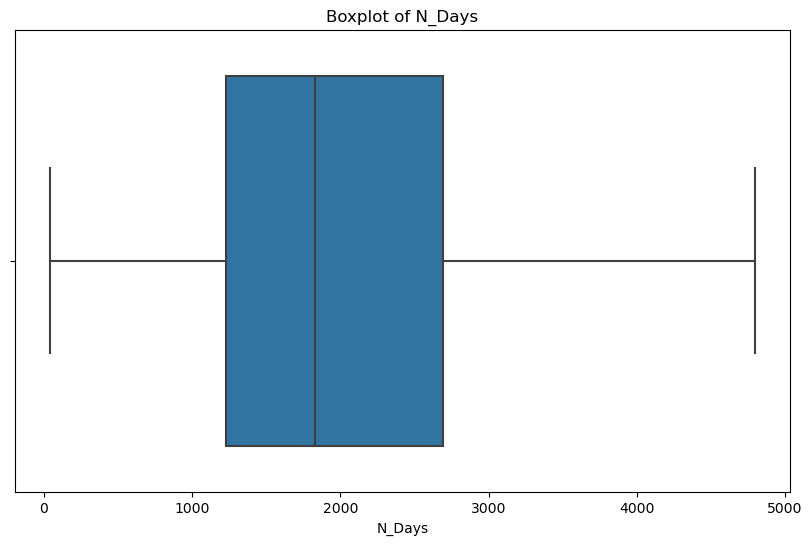

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['N_Days'])
plt.title('Boxplot of N_Days')
plt.show()

In [154]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Reshape data for the scaler
n_days_reshaped = train_df['N_Days'].values.reshape(-1, 1)

# Fit and transform the 'N_Days' feature
train_df['N_Days_Normalized'] = min_max_scaler.fit_transform(n_days_reshaped)

# Displaying the dataframe with the normalized column
train_df[['N_Days', 'N_Days_Normalized']]

,N_Days,N_Days_Normalized
0,999,0.201515
1,2574,0.532814
2,3428,0.712453
3,2576,0.533235
4,788,0.157131
...,...,...
7900,1166,0.236643
7901,1492,0.305217
7902,1576,0.322886
7903,3584,0.745267


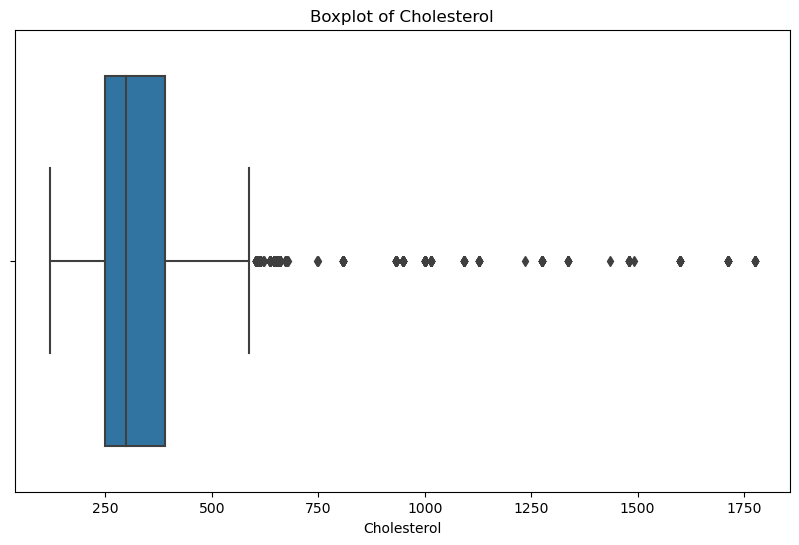

In [155]:
# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['Cholesterol'])
plt.title('Boxplot of Cholesterol')
plt.show()

In [156]:
train_df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,N_Days_Normalized
0,0,999,0,21532,1,0,0,0,0,2.3,...,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,2,0.201515
1,1,2574,1,19237,0,0,0,0,0,0.9,...,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0,0.532814
2,2,3428,1,13727,0,0,1,1,2,3.3,...,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,2,0.712453
3,3,2576,1,18460,0,0,0,0,0,0.6,...,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,0,0.533235
4,4,788,1,16658,0,0,1,0,0,1.1,...,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,0,0.157131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,0,16839,0,0,0,0,0,0.8,...,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,0,0.236643
7901,7901,1492,1,17031,0,0,1,0,0,0.9,...,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,0,0.305217
7902,7902,1576,0,25873,0,0,0,1,1,2.0,...,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,2,0.322886
7903,7903,3584,0,22960,1,0,1,0,0,0.7,...,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,2,0.745267


In [157]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7905 non-null   int64  
 1   N_Days             7905 non-null   int64  
 2   Drug               7905 non-null   int64  
 3   Age                7905 non-null   int64  
 4   Sex                7905 non-null   int64  
 5   Ascites            7905 non-null   int64  
 6   Hepatomegaly       7905 non-null   int64  
 7   Spiders            7905 non-null   int64  
 8   Edema              7905 non-null   int64  
 9   Bilirubin          7905 non-null   float64
 10  Cholesterol        7905 non-null   float64
 11  Albumin            7905 non-null   float64
 12  Copper             7905 non-null   float64
 13  Alk_Phos           7905 non-null   float64
 14  SGOT               7905 non-null   float64
 15  Tryglicerides      7905 non-null   float64
 16  Platelets          7905 

In [158]:
bilirubin_reshaped = train_df['Bilirubin'].values.reshape(-1, 1)

# Fit and transform the 'N_Days' feature
train_df['Bilirubin_Normalized'] = min_max_scaler.fit_transform(bilirubin_reshaped)

In [159]:
cholestrol_reshaped = train_df['Cholesterol'].values.reshape(-1, 1)
albumin_reshaped = train_df['Albumin'].values.reshape(-1, 1)
Copper_reshaped = train_df['Copper'].values.reshape(-1, 1)
alk_reshaped = train_df['Alk_Phos'].values.reshape(-1, 1)
sgot_reshaped = train_df['SGOT'].values.reshape(-1, 1)
tryg_reshaped = train_df['Tryglicerides'].values.reshape(-1, 1)
plat_reshaped = train_df['Platelets'].values.reshape(-1, 1)
proth_reshaped = train_df['Prothrombin'].values.reshape(-1, 1)


train_df['Cholesterol_Normalized'] = min_max_scaler.fit_transform(cholestrol_reshaped)
train_df['Albumin_Normalized'] = min_max_scaler.fit_transform(albumin_reshaped)
train_df['Copper_Normalized'] = min_max_scaler.fit_transform(Copper_reshaped)
train_df['Alk_Phos_Normalized'] = min_max_scaler.fit_transform(alk_reshaped)
train_df['SGOT_Normalized'] = min_max_scaler.fit_transform(sgot_reshaped)
train_df['Tryglicerides_Normalized'] = min_max_scaler.fit_transform(tryg_reshaped)
train_df['Platelets_Normalized'] = min_max_scaler.fit_transform(plat_reshaped)
train_df['Prothrombin_Normalized'] = min_max_scaler.fit_transform(proth_reshaped)




In [160]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7905 non-null   int64  
 1   N_Days                    7905 non-null   int64  
 2   Drug                      7905 non-null   int64  
 3   Age                       7905 non-null   int64  
 4   Sex                       7905 non-null   int64  
 5   Ascites                   7905 non-null   int64  
 6   Hepatomegaly              7905 non-null   int64  
 7   Spiders                   7905 non-null   int64  
 8   Edema                     7905 non-null   int64  
 9   Bilirubin                 7905 non-null   float64
 10  Cholesterol               7905 non-null   float64
 11  Albumin                   7905 non-null   float64
 12  Copper                    7905 non-null   float64
 13  Alk_Phos                  7905 non-null   float64
 14  SGOT    

In [161]:
train_df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,N_Days_Normalized,Bilirubin_Normalized,Cholesterol_Normalized,Albumin_Normalized,Copper_Normalized,Alk_Phos_Normalized,SGOT_Normalized,Tryglicerides_Normalized,Platelets_Normalized,Prothrombin_Normalized
0,0,999,0,21532,1,0,0,0,0,2.3,...,0.201515,0.072202,0.118429,0.518657,0.287671,0.096660,0.356115,0.053097,0.662675,0.077778
1,1,2574,1,19237,0,0,0,0,0,0.9,...,0.532814,0.021661,0.147432,0.589552,0.101027,0.084798,0.251799,0.097345,0.596806,0.222222
2,2,3428,1,13727,0,0,1,1,2,3.3,...,0.712453,0.108303,0.108157,0.593284,0.217466,0.054518,0.215827,0.030088,0.273453,0.300000
3,3,2576,1,18460,0,0,0,0,0,0.6,...,0.533235,0.010830,0.082175,0.574627,0.092466,0.100491,0.104317,0.111504,0.413174,0.188889
4,4,788,1,16658,0,0,1,0,0,1.1,...,0.157131,0.028881,0.136556,0.630597,0.101027,0.065717,0.230216,0.111504,0.471058,0.177778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,0,16839,0,0,0,0,0,0.8,...,0.236643,0.018051,0.114199,0.597015,0.058219,0.098723,0.122302,0.338053,0.562874,0.100000
7901,7901,1492,1,17031,0,0,1,0,0,0.9,...,0.305217,0.021661,0.084592,0.548507,0.099315,0.084798,0.268392,0.079646,0.429142,0.111111
7902,7902,1576,0,25873,0,0,0,1,1,2.0,...,0.322886,0.061372,0.063444,0.458955,0.080479,0.047446,0.100719,0.051327,0.275449,0.411111
7903,7903,3584,0,22960,1,0,1,0,0,0.7,...,0.745267,0.014440,0.077341,0.294776,0.047945,0.052603,0.071942,0.150442,0.317365,0.177778


In [162]:
train_df_copy = train_df.copy()

In [163]:
train_df_copy

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,N_Days_Normalized,Bilirubin_Normalized,Cholesterol_Normalized,Albumin_Normalized,Copper_Normalized,Alk_Phos_Normalized,SGOT_Normalized,Tryglicerides_Normalized,Platelets_Normalized,Prothrombin_Normalized
0,0,999,0,21532,1,0,0,0,0,2.3,...,0.201515,0.072202,0.118429,0.518657,0.287671,0.096660,0.356115,0.053097,0.662675,0.077778
1,1,2574,1,19237,0,0,0,0,0,0.9,...,0.532814,0.021661,0.147432,0.589552,0.101027,0.084798,0.251799,0.097345,0.596806,0.222222
2,2,3428,1,13727,0,0,1,1,2,3.3,...,0.712453,0.108303,0.108157,0.593284,0.217466,0.054518,0.215827,0.030088,0.273453,0.300000
3,3,2576,1,18460,0,0,0,0,0,0.6,...,0.533235,0.010830,0.082175,0.574627,0.092466,0.100491,0.104317,0.111504,0.413174,0.188889
4,4,788,1,16658,0,0,1,0,0,1.1,...,0.157131,0.028881,0.136556,0.630597,0.101027,0.065717,0.230216,0.111504,0.471058,0.177778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,0,16839,0,0,0,0,0,0.8,...,0.236643,0.018051,0.114199,0.597015,0.058219,0.098723,0.122302,0.338053,0.562874,0.100000
7901,7901,1492,1,17031,0,0,1,0,0,0.9,...,0.305217,0.021661,0.084592,0.548507,0.099315,0.084798,0.268392,0.079646,0.429142,0.111111
7902,7902,1576,0,25873,0,0,0,1,1,2.0,...,0.322886,0.061372,0.063444,0.458955,0.080479,0.047446,0.100719,0.051327,0.275449,0.411111
7903,7903,3584,0,22960,1,0,1,0,0,0.7,...,0.745267,0.014440,0.077341,0.294776,0.047945,0.052603,0.071942,0.150442,0.317365,0.177778


In [164]:
train_df_copy.drop(train_df_copy.columns[9:18], axis=1, inplace=True)


In [165]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7905 non-null   int64  
 1   N_Days                    7905 non-null   int64  
 2   Drug                      7905 non-null   int64  
 3   Age                       7905 non-null   int64  
 4   Sex                       7905 non-null   int64  
 5   Ascites                   7905 non-null   int64  
 6   Hepatomegaly              7905 non-null   int64  
 7   Spiders                   7905 non-null   int64  
 8   Edema                     7905 non-null   int64  
 9   Stage                     7905 non-null   float64
 10  Status                    7905 non-null   int64  
 11  N_Days_Normalized         7905 non-null   float64
 12  Bilirubin_Normalized      7905 non-null   float64
 13  Cholesterol_Normalized    7905 non-null   float64
 14  Albumin_

In [166]:
train_df_copy

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage,...,N_Days_Normalized,Bilirubin_Normalized,Cholesterol_Normalized,Albumin_Normalized,Copper_Normalized,Alk_Phos_Normalized,SGOT_Normalized,Tryglicerides_Normalized,Platelets_Normalized,Prothrombin_Normalized
0,0,999,0,21532,1,0,0,0,0,3.0,...,0.201515,0.072202,0.118429,0.518657,0.287671,0.096660,0.356115,0.053097,0.662675,0.077778
1,1,2574,1,19237,0,0,0,0,0,3.0,...,0.532814,0.021661,0.147432,0.589552,0.101027,0.084798,0.251799,0.097345,0.596806,0.222222
2,2,3428,1,13727,0,0,1,1,2,4.0,...,0.712453,0.108303,0.108157,0.593284,0.217466,0.054518,0.215827,0.030088,0.273453,0.300000
3,3,2576,1,18460,0,0,0,0,0,3.0,...,0.533235,0.010830,0.082175,0.574627,0.092466,0.100491,0.104317,0.111504,0.413174,0.188889
4,4,788,1,16658,0,0,1,0,0,4.0,...,0.157131,0.028881,0.136556,0.630597,0.101027,0.065717,0.230216,0.111504,0.471058,0.177778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,0,16839,0,0,0,0,0,2.0,...,0.236643,0.018051,0.114199,0.597015,0.058219,0.098723,0.122302,0.338053,0.562874,0.100000
7901,7901,1492,1,17031,0,0,1,0,0,4.0,...,0.305217,0.021661,0.084592,0.548507,0.099315,0.084798,0.268392,0.079646,0.429142,0.111111
7902,7902,1576,0,25873,0,0,0,1,1,2.0,...,0.322886,0.061372,0.063444,0.458955,0.080479,0.047446,0.100719,0.051327,0.275449,0.411111
7903,7903,3584,0,22960,1,0,1,0,0,4.0,...,0.745267,0.014440,0.077341,0.294776,0.047945,0.052603,0.071942,0.150442,0.317365,0.177778


In [167]:
train_df_copy['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7905 entries, 0 to 7904
Series name: Age
Non-Null Count  Dtype
--------------  -----
7905 non-null   int64
dtypes: int64(1)
memory usage: 61.9 KB


In [168]:
age_reshaped = train_df['Age'].values.reshape(-1, 1)
train_df_copy['Age_Normalized'] = min_max_scaler.fit_transform(age_reshaped)

In [169]:
train_df_copy['Status'].value_counts()

0    4965
2    2665
1     275
Name: Status, dtype: int64

In [170]:
train_df_copy = train_df_copy.drop('id', axis=1)
train_df_copy = train_df_copy.drop('N_Days', axis=1)
train_df_copy = train_df_copy.drop('Age', axis=1)
train_df_copy.head()  # Display the first few rows to confirm the column is dropped


,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage,Status,N_Days_Normalized,Bilirubin_Normalized,Cholesterol_Normalized,Albumin_Normalized,Copper_Normalized,Alk_Phos_Normalized,SGOT_Normalized,Tryglicerides_Normalized,Platelets_Normalized,Prothrombin_Normalized,Age_Normalized
0,0,1,0,0,0,0,3.0,2,0.201515,0.072202,0.118429,0.518657,0.287671,0.096660,0.356115,0.053097,0.662675,0.077778,0.626391
1,1,0,0,0,0,0,3.0,0,0.532814,0.021661,0.147432,0.589552,0.101027,0.084798,0.251799,0.097345,0.596806,0.222222,0.505931
2,1,0,0,1,1,2,4.0,2,0.712453,0.108303,0.108157,0.593284,0.217466,0.054518,0.215827,0.030088,0.273453,0.300000,0.216723
3,1,0,0,0,0,0,3.0,0,0.533235,0.010830,0.082175,0.574627,0.092466,0.100491,0.104317,0.111504,0.413174,0.188889,0.465148
4,1,0,0,1,0,0,4.0,0,0.157131,0.028881,0.136556,0.630597,0.101027,0.065717,0.230216,0.111504,0.471058,0.177778,0.370565


# Test Dataset Preprocessing

In [171]:
test_df.isnull()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5267,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5268,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5269,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [172]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

## Test Data Encoding of Numerical Features

In [173]:
age_reshaped1 = test_df['Age'].values.reshape(-1, 1)
N_days_reshaped1 = test_df['N_Days'].values.reshape(-1, 1)
bilirubin_reshaped1 = test_df['Bilirubin'].values.reshape(-1, 1)
cholestrol_reshaped1 = test_df['Cholesterol'].values.reshape(-1, 1)
albumin_reshaped1 = test_df['Albumin'].values.reshape(-1, 1)
copper_reshaped1 = test_df['Copper'].values.reshape(-1, 1)
alk_phos_reshaped1 = test_df['Alk_Phos'].values.reshape(-1, 1)
SGOT_reshaped1 = test_df['SGOT'].values.reshape(-1, 1)
trygl_reshaped1 = test_df['Tryglicerides'].values.reshape(-1, 1)
plate_reshaped1 = test_df['Platelets'].values.reshape(-1, 1)
prothr_reshaped1 = test_df['Prothrombin'].values.reshape(-1, 1)


# Fit and transform the 'N_Days' feature
test_df['N_Days_Normalized'] = min_max_scaler.fit_transform(N_days_reshaped1)
test_df['Age_Normalized'] = min_max_scaler.fit_transform(age_reshaped1)
test_df['Bilirubin_Normalized'] = min_max_scaler.fit_transform(bilirubin_reshaped1)
test_df['Cholesterol_Normalized'] = min_max_scaler.fit_transform(cholestrol_reshaped1)
test_df['Albumin_Normalized'] = min_max_scaler.fit_transform(albumin_reshaped1)
test_df['Copper_Normalized'] = min_max_scaler.fit_transform(copper_reshaped1)
test_df['Alk_Phos_Normalized'] = min_max_scaler.fit_transform(alk_phos_reshaped1)
test_df['SGOT_Normalized'] = min_max_scaler.fit_transform(SGOT_reshaped1)
test_df['Tryglicerides_Normalized'] = min_max_scaler.fit_transform(trygl_reshaped1)
test_df['Platelets_Normalized'] = min_max_scaler.fit_transform(plate_reshaped1)
test_df['Prothrombin_Normalized'] = min_max_scaler.fit_transform(prothr_reshaped1)


## Categorical Features Label Encoding for Test Data

In [174]:
test_df['Ascites'] = label_encoder.fit_transform(test_df['Ascites'])
test_df['Sex'] = label_encoder.fit_transform(test_df['Sex'])
test_df['Drug'] = label_encoder.fit_transform(test_df['Drug'])
test_df['Hepatomegaly'] = label_encoder.fit_transform(test_df['Hepatomegaly'])
test_df['Spiders'] = label_encoder.fit_transform(test_df['Spiders'])
test_df['Edema'] = label_encoder.fit_transform(test_df['Edema'])

In [175]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        5271 non-null   int64  
 1   N_Days                    5271 non-null   int64  
 2   Drug                      5271 non-null   int64  
 3   Age                       5271 non-null   int64  
 4   Sex                       5271 non-null   int64  
 5   Ascites                   5271 non-null   int64  
 6   Hepatomegaly              5271 non-null   int64  
 7   Spiders                   5271 non-null   int64  
 8   Edema                     5271 non-null   int64  
 9   Bilirubin                 5271 non-null   float64
 10  Cholesterol               5271 non-null   float64
 11  Albumin                   5271 non-null   float64
 12  Copper                    5271 non-null   float64
 13  Alk_Phos                  5271 non-null   float64
 14  SGOT    

In [195]:
test_df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Age_Normalized,Bilirubin_Normalized,Cholesterol_Normalized,Albumin_Normalized,Copper_Normalized,Alk_Phos_Normalized,SGOT_Normalized,Tryglicerides_Normalized,Platelets_Normalized,Prothrombin_Normalized
0,7905,3839,0,19724,0,0,1,0,0,1.2,...,0.531493,0.032491,0.257402,0.526119,0.104452,0.099238,0.291367,0.100885,0.734531,0.258065
1,7906,2468,0,14975,0,0,0,0,0,1.1,...,0.282228,0.028881,0.326284,0.843284,0.154110,0.071316,0.291367,0.215929,0.329341,0.161290
2,7907,51,1,13149,0,0,1,0,2,2.0,...,0.186385,0.061372,0.018731,0.373134,0.071918,0.049509,0.100719,0.120354,0.301397,0.645161
3,7908,2330,0,20510,0,0,0,0,0,0.6,...,0.572748,0.010830,0.104532,0.705224,0.061644,0.019523,0.230216,0.040708,0.415170,0.258065
4,7909,1615,0,21904,0,0,1,0,0,1.4,...,0.645916,0.039711,0.094864,0.376866,0.200342,0.060486,0.228939,0.164602,0.317365,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,1,12279,0,0,0,0,0,1.3,...,0.140720,0.036101,0.109970,0.548507,0.121575,0.077799,0.275354,0.019469,0.237525,0.258065
5267,13172,1770,1,24803,0,0,0,0,0,0.5,...,0.798079,0.007220,0.059819,0.794776,0.200342,0.027554,0.122302,0.107965,0.497006,0.112903
5268,13173,3707,0,16990,0,0,1,0,0,0.8,...,0.387991,0.018051,0.117825,0.794776,0.015411,0.099312,0.334532,0.065487,0.726547,0.306452
5269,13174,1216,1,11773,0,0,0,0,0,0.7,...,0.114161,0.014440,0.126284,0.686567,0.082192,0.028659,0.071130,0.164602,0.487026,0.193548


In [176]:
test_df_copy = test_df.copy()

In [177]:


# Dropping 'N_Days', 'Age', and columns 9 to 17 (inclusive)
# In this example, 'N_Days' and 'Age' are replaced with 'Column_1' and 'Column_3' respectively
test_df_copy.drop(test_df_copy.columns[9:18], axis=1, inplace=True)

test_df_copy.columns 

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Stage', 'N_Days_Normalized', 'Age_Normalized',
       'Bilirubin_Normalized', 'Cholesterol_Normalized', 'Albumin_Normalized',
       'Copper_Normalized', 'Alk_Phos_Normalized', 'SGOT_Normalized',
       'Tryglicerides_Normalized', 'Platelets_Normalized',
       'Prothrombin_Normalized'],
      dtype='object')

In [178]:
test_df_copy = test_df_copy.drop('id', axis=1)
test_df_copy = test_df_copy.drop('N_Days', axis=1)
test_df_copy = test_df_copy.drop('Age', axis=1)

In [179]:
test_df_copy

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage,N_Days_Normalized,Age_Normalized,Bilirubin_Normalized,Cholesterol_Normalized,Albumin_Normalized,Copper_Normalized,Alk_Phos_Normalized,SGOT_Normalized,Tryglicerides_Normalized,Platelets_Normalized,Prothrombin_Normalized
0,0,0,0,1,0,0,2.0,0.798906,0.531493,0.032491,0.257402,0.526119,0.104452,0.099238,0.291367,0.100885,0.734531,0.258065
1,0,0,0,0,0,0,2.0,0.510517,0.282228,0.028881,0.326284,0.843284,0.154110,0.071316,0.291367,0.215929,0.329341,0.161290
2,1,0,0,1,0,2,4.0,0.002103,0.186385,0.061372,0.018731,0.373134,0.071918,0.049509,0.100719,0.120354,0.301397,0.645161
3,0,0,0,0,0,0,2.0,0.481489,0.572748,0.010830,0.104532,0.705224,0.061644,0.019523,0.230216,0.040708,0.415170,0.258065
4,0,0,0,1,0,0,1.0,0.331090,0.645916,0.039711,0.094864,0.376866,0.200342,0.060486,0.228939,0.164602,0.317365,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,1,0,0,0,0,0,3.0,0.595078,0.140720,0.036101,0.109970,0.548507,0.121575,0.077799,0.275354,0.019469,0.237525,0.258065
5267,1,0,0,0,0,0,3.0,0.363694,0.798079,0.007220,0.059819,0.794776,0.200342,0.027554,0.122302,0.107965,0.497006,0.112903
5268,0,0,0,1,0,0,3.0,0.771140,0.387991,0.018051,0.117825,0.794776,0.015411,0.099312,0.334532,0.065487,0.726547,0.306452
5269,1,0,0,0,0,0,1.0,0.247160,0.114161,0.014440,0.126284,0.686567,0.082192,0.028659,0.071130,0.164602,0.487026,0.193548


# Feature Selection using GridSearch

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Assuming train_df_copy is your dataframe and it's already preprocessed
X = train_df_copy[['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 
                   'Edema', 'Stage', 'N_Days_Normalized', 'Bilirubin_Normalized',
                   'Cholesterol_Normalized', 'Albumin_Normalized', 'Copper_Normalized',
                   'Alk_Phos_Normalized', 'SGOT_Normalized', 'Tryglicerides_Normalized', 
                   'Platelets_Normalized', 'Prothrombin_Normalized', 'Age_Normalized']]
y = train_df_copy['Status']

In [181]:
model = LogisticRegression(solver='liblinear')

# Create the RFE (Recursive Feature Elimination) and Logistic Regression pipeline
rfe = RFECV(estimator=model, step=1, cv=5)
pipeline = Pipeline(steps=[('Feature_Selection', rfe), ('Model', model)])

# Define the grid (here you specify the range of features you want to test)
# For example, testing 5 to 15 features. You can adjust the range based on your specific needs
param_grid = {
    'Feature_Selection__min_features_to_select': list(range(5, 16))
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best number of features and the features selected
print(f"Best Number of Features: {grid_search.best_estimator_.named_steps['Feature_Selection'].n_features_}")
print(f"Selected Features: {X.columns[grid_search.best_estimator_.named_steps['Feature_Selection'].support_]}")
print(f"Best Score: {grid_search.best_score_}")

Best Number of Features: 18
Selected Features: Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage',
       'N_Days_Normalized', 'Bilirubin_Normalized', 'Cholesterol_Normalized',
       'Albumin_Normalized', 'Copper_Normalized', 'Alk_Phos_Normalized',
       'SGOT_Normalized', 'Tryglicerides_Normalized', 'Platelets_Normalized',
       'Prothrombin_Normalized', 'Age_Normalized'],
      dtype='object')
Best Score: 0.7913978494623656


# RandomForest Model Training

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Separate features and target in training and testing sets
X_train = train_df_copy[['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 
                   'Edema', 'Stage', 'N_Days_Normalized', 'Bilirubin_Normalized',
                   'Cholesterol_Normalized', 'Albumin_Normalized', 'Copper_Normalized',
                   'Alk_Phos_Normalized', 'SGOT_Normalized', 'Tryglicerides_Normalized', 
                   'Platelets_Normalized', 'Prothrombin_Normalized', 'Age_Normalized']]
y_train = train_df_copy['Status']
X_test = test_df_copy

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    # Add other parameters if needed
}

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Train the RandomForestClassifier with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Assuming you want to see or store the predictions
print(y_pred)
# Optionally, you can add these predictions to the test dataset for further analysis
test_df_copy['Predicted'] = y_pred

[2 2 2 ... 2 2 2]


/Users/aniket-/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [191]:
test_df_copy = test_df_copy.drop('Predicted', axis=1)

In [192]:
test_df_copy

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage,N_Days_Normalized,Age_Normalized,Bilirubin_Normalized,Cholesterol_Normalized,Albumin_Normalized,Copper_Normalized,Alk_Phos_Normalized,SGOT_Normalized,Tryglicerides_Normalized,Platelets_Normalized,Prothrombin_Normalized
0,0,0,0,1,0,0,2.0,0.798906,0.531493,0.032491,0.257402,0.526119,0.104452,0.099238,0.291367,0.100885,0.734531,0.258065
1,0,0,0,0,0,0,2.0,0.510517,0.282228,0.028881,0.326284,0.843284,0.154110,0.071316,0.291367,0.215929,0.329341,0.161290
2,1,0,0,1,0,2,4.0,0.002103,0.186385,0.061372,0.018731,0.373134,0.071918,0.049509,0.100719,0.120354,0.301397,0.645161
3,0,0,0,0,0,0,2.0,0.481489,0.572748,0.010830,0.104532,0.705224,0.061644,0.019523,0.230216,0.040708,0.415170,0.258065
4,0,0,0,1,0,0,1.0,0.331090,0.645916,0.039711,0.094864,0.376866,0.200342,0.060486,0.228939,0.164602,0.317365,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,1,0,0,0,0,0,3.0,0.595078,0.140720,0.036101,0.109970,0.548507,0.121575,0.077799,0.275354,0.019469,0.237525,0.258065
5267,1,0,0,0,0,0,3.0,0.363694,0.798079,0.007220,0.059819,0.794776,0.200342,0.027554,0.122302,0.107965,0.497006,0.112903
5268,0,0,0,1,0,0,3.0,0.771140,0.387991,0.018051,0.117825,0.794776,0.015411,0.099312,0.334532,0.065487,0.726547,0.306452
5269,1,0,0,0,0,0,1.0,0.247160,0.114161,0.014440,0.126284,0.686567,0.082192,0.028659,0.071130,0.164602,0.487026,0.193548


In [193]:
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [185]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", scores.mean())


Cross-validated accuracy: 0.8246679316888045


In [194]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Separate features and target in the training set
X_train = train_df_copy[['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 
                   'Edema', 'Stage', 'N_Days_Normalized', 'Bilirubin_Normalized',
                   'Cholesterol_Normalized', 'Albumin_Normalized', 'Copper_Normalized',
                   'Alk_Phos_Normalized', 'SGOT_Normalized', 'Tryglicerides_Normalized', 
                   'Platelets_Normalized', 'Prothrombin_Normalized', 'Age_Normalized']]
y_train = train_df_copy['Status']

# Prepare the test set features
X_test = test_df_copy  # Assuming test_df_copy contains only features

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [100],  # Regularization parameter
    'gamma': [0.001],  # Kernel coefficient
    'kernel': ['poly']  # Type of kernel
}

# Create an SVC (Support Vector Classifier) with probability enabled
svc = SVC(probability=True)

# Create a GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (on training data): {grid_search.best_score_}")

# Use the best estimator to predict probabilities on the test set
best_svc = grid_search.best_estimator_
y_pred_proba = best_svc.predict_proba(X_test)

# Print or store the predicted probabilities
print(y_pred_proba)

submission_df = pd.DataFrame(y_pred_proba, columns=['Prob_C', 'Prob_D', 'Prob_CL'])

# Save the DataFrame to a CSV file
submission_file_path = '/Users/aniket-/Documents/coding/kaggle/playground-series-s3e26/submission_proba.csv'  # Define the file path
submission_df.to_csv(submission_file_path, index=False)  # Save to CSV without the index

submission_file_path  # Display the file path for download


Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'poly'}
Best Score (on training data): 0.6280834914611005


/Users/aniket-/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


[[0.79652799 0.05249963 0.15097237]
 [0.83513826 0.0452128  0.11964894]
 [0.02687022 0.0869147  0.88621508]
 ...
 [0.6409273  0.04836551 0.31070719]
 [0.85045607 0.05335369 0.09619025]
 [0.82923827 0.04370454 0.12705719]]


'/Users/aniket-/Documents/coding/kaggle/playground-series-s3e26/submission_proba.csv'

In [196]:
submission_df

,Prob_C,Prob_D,Prob_CL
0,0.796528,0.052500,0.150972
1,0.835138,0.045213,0.119649
2,0.026870,0.086915,0.886215
3,0.831585,0.045345,0.123070
4,0.843607,0.053239,0.103154
...,...,...,...
5266,0.763045,0.047431,0.189524
5267,0.719547,0.046573,0.233881
5268,0.640927,0.048366,0.310707
5269,0.850456,0.053354,0.096190


In [197]:
submission_df['id'] = test_df['id']
submission_df = submission_df[['id', 'Prob_C', 'Prob_D', 'Prob_CL']]  # Reorder columns to put 'id' first

submission_df.head()


,id,Prob_C,Prob_D,Prob_CL
0,7905,0.796528,0.052500,0.150972
1,7906,0.835138,0.045213,0.119649
2,7907,0.026870,0.086915,0.886215
3,7908,0.831585,0.045345,0.123070
4,7909,0.843607,0.053239,0.103154


In [198]:
# Renaming the columns in submission_df
submission_df.rename(columns={'Prob_C': 'Status_C', 'Prob_D': 'Status_D', 'Prob_CL': 'Status_CL'}, inplace=True)

# Display the first few rows of the updated submission_df to confirm the changes
submission_df.head()



,id,Status_C,Status_D,Status_CL
0,7905,0.796528,0.052500,0.150972
1,7906,0.835138,0.045213,0.119649
2,7907,0.026870,0.086915,0.886215
3,7908,0.831585,0.045345,0.123070
4,7909,0.843607,0.053239,0.103154


In [199]:
submission_df = submission_df[['id', 'Status_C', 'Status_CL', 'Status_D']]

In [200]:
submission_df

,id,Status_C,Status_CL,Status_D
0,7905,0.796528,0.150972,0.052500
1,7906,0.835138,0.119649,0.045213
2,7907,0.026870,0.886215,0.086915
3,7908,0.831585,0.123070,0.045345
4,7909,0.843607,0.103154,0.053239
...,...,...,...,...
5266,13171,0.763045,0.189524,0.047431
5267,13172,0.719547,0.233881,0.046573
5268,13173,0.640927,0.310707,0.048366
5269,13174,0.850456,0.096190,0.053354


In [201]:
submission_file_path = '/Users/aniket-/Documents/coding/kaggle/playground-series-s3e26/submission.csv'  # Define the file path
submission_df.to_csv(submission_file_path, index=False)  # Save to CSV without the index